In [1]:
!pip install pandas
!pip install seaborn
!pip install statsmodels
!pip install scikit-learn
!pip install scipy

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Работа с датасетом

Для начала поизучаем данные, с которыми нам предстоит работать.

In [3]:
data_raw = pd.read_csv('data.csv', parse_dates=["date_of", "ctl_loading_date"])

In [4]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995004 entries, 0 to 995003
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   benchmark_id      995004 non-null  object        
 1   benchmark_name    995004 non-null  object        
 2   date_of           995004 non-null  datetime64[ns]
 3   quote             995004 non-null  float64       
 4   ctl_loading       995004 non-null  int64         
 5   ctl_loading_date  995004 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(2)
memory usage: 45.5+ MB


In [5]:
len(data_raw.benchmark_id.unique()), len (data_raw.benchmark_name.unique())

(516, 511)

In [6]:
data_raw.sample(10)

,benchmark_id,benchmark_name,date_of,quote,ctl_loading,ctl_loading_date
425086,AB9A1AE3-319A-40A2-94DD-861FEAB4DF00,"Ставка 7,3273%",2020-10-22,8.700183,24907841089,2020-10-25
532168,A8D6469D-D47A-4CDB-B0EF-D7E6E0F15C59,NPF.PENS.49.22 с 01.08.22 (Индекс рассчитанный...,2021-06-12,430.578791,24033715795,2021-06-12
157083,919E7334-E29A-41EF-A64F-030818B1E010,20%EPSITR + 80%RUCBTR3A3YNS,2019-03-17,202.833362,32615281661,2019-03-17
279707,76E02CB0-C733-4654-A71D-D87AA81532A6,Russia 24/06/2028,2019-12-09,67.655879,67775882587,2019-12-09
653537,A12E5805-4DC9-4E28-A0CE-7CF4FAEC0356,RGBI TR,2022-03-05,165.051878,54898808125,2022-03-05
513121,13A6D43B-F976-4CF4-9CA0-513D7A0E6494,Индекс гос. облигаций (≤ 1 года),2021-05-02,204.321846,38997500956,2021-05-02
737221,EB51464F-A661-4C12-A4E8-DE7233E71F13,CSI Overseas China Internet Total Return Index,2022-09-03,2.396186,31081845501,2022-09-03
654677,823041DA-A9DE-40D4-982F-D89034FD65CB,ОФЗ 29007,2022-03-07,2.090733,87007792542,2022-03-07
766381,E49B875D-0BA1-427D-B78C-797675097F3B,50% RUEU10 + 50% Russia 21/03/2029 - 0.2% год.,2022-11-05,448.683193,2975055537,2022-11-05
908610,701FA0E3-51E3-4600-8285-B9E4164B7F98,(60%SPXT Index + 20%SX5T Index + 20%M2EFIM Index),2023-09-11,21.042971,86200831223,2023-09-11


In [7]:
aggname_df = data_raw.groupby(by = ['benchmark_name'])['benchmark_id'].agg(['unique'])
aggname_df['len'] = aggname_df['unique'].map(len)
aggname_df.loc[aggname_df['len'] > 1]

,unique,len
benchmark_name,,
34.44%EMB + 20.42%VCIT + 21.31%NOBL + 23.83%GLD,"[0AB1792A-837C-4A1C-9752-06A63057B79E, 295D397...",2
40% EMB + 36% VCIT + 13% NOBL + 11% GLD,"[81CEE985-55AC-4ADE-88AC-6A33BAF41A17, AF25F87...",2
40%RUGBITR3Y+60%RUGBITR1Y,"[2D4EF6CD-7300-4AC6-AD2F-6C7C8738A12F, 098AFF7...",3
Technology Select Sector Index,"[8D8AADAB-A754-4C02-9C81-0E0B4890856B, 51D93A6...",2


In [8]:
len_no_weak_dub = len(data_raw.drop_duplicates(subset=["benchmark_id", "ctl_loading", "quote"]))
len_no_dub = len(data_raw.drop_duplicates(subset=["benchmark_id", "ctl_loading"]))

In [9]:
print(f"Количество строк с дубликатами: {len(data_raw)}")
print(f"Количество строк без дубликатов бенчмарков в поставках с учётом значений котировок: {len_no_weak_dub}")
print(f"Количество строк без дубликатов бенчмарков в поставках: {len_no_dub}")

Количество строк с дубликатами: 995004
Количество строк без дубликатов бенчмарков в поставках с учётом значений котировок: 947926
Количество строк без дубликатов бенчмарков в поставках: 928150


Где-то 5% от всех строк составляют дубликаты при учёте, что строки с разными котировками дубликатами не считаются. Ещё 2% строк - дубликаты без учёта котировок.

In [10]:
print("Количество поставок: ", len(data_raw["ctl_loading"].unique()),
      ", количество уникальных пар ctl_loading_date-date_of для поставок: ", len(data_raw.groupby(["ctl_loading_date", "date_of"])["ctl_loading"].unique()),
      ", количество уникальных пар ctl_loading-date_of: ", len(data_raw.groupby(["ctl_loading", "date_of"])["ctl_loading_date"].unique()), sep="")

Количество поставок: 2295, количество уникальных пар ctl_loading_date-date_of для поставок: 2295, количество уникальных пар ctl_loading-date_of: 2295


Равенство между количеством уникальных значений id поставки и пар date_of - ctl_loading_date означает, что не существует двух поставок с совпадающими date_of и ctl_loading_date.

<Axes: ylabel='Count'>

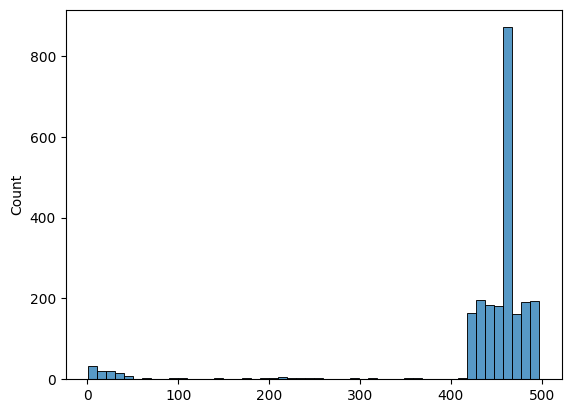

In [11]:
sns.histplot(data_raw.groupby(["ctl_loading", "ctl_loading_date"]).size().to_numpy(), bins=50)

Примерно треть поставок содержит в себе от 450 до 460 строк.

In [12]:
print(data_raw.groupby(["ctl_loading_date"])["ctl_loading"].unique().apply(len).unique())

[1 2 3 6 5 4]


В день может приходить от 1 до 6 поставок.

In [13]:
len(data_raw["date_of"].unique()), len(data_raw["ctl_loading"].unique())

(2168, 2295)

Порядка 130 поставок из 2300 являются допоставками.

In [14]:
date_min = data_raw["ctl_loading_date"].min().date()
date_max = data_raw["ctl_loading_date"].max().date()

In [15]:
print(f" Данные представлены за промежуток от {date_min} до {date_max}.")

 Данные представлены за промежуток от 2018-04-09 до 2024-03-15.


## Группировка данных

Чтобы определить, является ли поставка аномальной, нужно знать количество бенчмарков, которые в ней содержатся. Посчитаем количества бенчмарков в посылках: без дубликатов и с ними, с учётом всех предыдущих посылок, относящейся к этой дате и без.

In [16]:
data_raw_no_dub = data_raw.drop_duplicates(subset=["ctl_loading", "benchmark_id"])               #Дубликатами считаются одинаковые бенчмарки в посылках
data_raw_weak_no_dub = data_raw.drop_duplicates(subset=["ctl_loading", "benchmark_id", "quote"]) #Дубликатами считаются одинаковые бенчмарки в посылках с одинаковыми котировками

In [17]:
concat_list = []
for loading in data_raw["ctl_loading"].unique():
    quote_date = data_raw[data_raw["ctl_loading"] == loading]["date_of"].unique()[0]
    loading_date = data_raw[data_raw["ctl_loading"] == loading]["ctl_loading_date"].unique()[0]
    new_df = data_raw[((data_raw["date_of"] == quote_date) & (data_raw["ctl_loading_date"] < loading_date)) | (data_raw["ctl_loading"] == loading)]
    new_df.loc[:,"ctl_loading"] = loading
    concat_list.append(new_df)
concat_data = pd.concat(concat_list)
concat_data

,benchmark_id,benchmark_name,date_of,quote,ctl_loading,ctl_loading_date
0,00000000-0000-0000-0000-000000000001,Ruonia,2018-04-09,513.893595,38463471715,2018-04-09
1,005F4F7B-D562-4B0F-BDC9-EB892065A955,RUGBITR1Y,2018-04-09,153.916680,38463471715,2018-04-09
2,03B447D1-2B2D-4AC2-90C1-5DF2935D4FD1,50%RUCBITRBB3Y + 50%RUCBITRBBB3Y,2018-04-09,48.649655,38463471715,2018-04-09
3,050C195A-1D74-402F-B36D-63CA40AFE789,60% RUGBITR1Y+40% RUONIA Index,2018-04-09,277.774791,38463471715,2018-04-09
4,050C195A-1D74-402F-B36D-63CA40AFE789,60% RUGBITR1Y+40% RUONIA Index,2018-04-09,277.774791,38463471715,2018-04-09
...,...,...,...,...,...,...
994999,F68E9BE2-B3A2-4923-B648-14C424A84EF0,ОФЗ 24021,2024-03-15,861.989892,83427809714,2024-03-15
995000,F846C875-184D-4862-8C0E-5A5D58E4FD20,50%*RUGBITR3Y + 50%*Ставка 12.4174%,2024-03-15,7.639006,83427809714,2024-03-15
995001,FB5DFAD6-CF72-4C1A-B78C-EE42A1D0BFE0,"Ставка 7,7%",2024-03-15,2.477175,83427809714,2024-03-15
995002,FCE411C7-6A5C-4AB3-8626-070844143139,MBI TR 3Y,2024-03-15,1493.885023,83427809714,2024-03-15


In [18]:
concat_data.reset_index(inplace=True)
concat_data.sort_values(by=["ctl_loading_date"], ascending=True)
concat_data.drop(columns=["index"], inplace=True)

In [19]:
concat_no_dublicates = concat_data.drop_duplicates(subset=["ctl_loading", "benchmark_id"], keep='last')
concat_weak_no_dublicates = concat_data.drop_duplicates(subset=["ctl_loading", "benchmark_id", "quote"], keep='last')

In [20]:
aggregated_quantity = concat_data.groupby(["ctl_loading"]).size()
aggregated_quantity_no_dublicates = concat_no_dublicates.groupby(["ctl_loading"]).size()
weak_aggregated_quantity_no_dublicates = concat_weak_no_dublicates.groupby(["ctl_loading"]).size()
quantity = data_raw.groupby(["ctl_loading"]).size()
quantity_no_dub = data_raw_no_dub.groupby(["ctl_loading"]).size()
weak_quantity_no_dub = data_raw_weak_no_dub.groupby(["ctl_loading"]).size()

In [21]:
date_of = data_raw[["ctl_loading", "date_of"]].drop_duplicates().set_index("ctl_loading")
ctl_date = data_raw[["ctl_loading", "ctl_loading_date"]].drop_duplicates().set_index("ctl_loading")

In [22]:
loadings = pd.concat([date_of,
                      ctl_date,
                      quantity,
                      weak_quantity_no_dub,
                      quantity_no_dub,
                      aggregated_quantity,
                      weak_aggregated_quantity_no_dublicates,
                      aggregated_quantity_no_dublicates], axis=1).rename(columns={0: 'quan',
                                                                                  1: "quan_no_weak_dub",
                                                                                  2: 'quan_no_dub',
                                                                                  3: 'agg_quan',
                                                                                  4: "agg_quan_no_week_dub",
                                                                                  5: 'agg_quan_no_dub'})
loadings

,date_of,ctl_loading_date,quan,quan_no_weak_dub,quan_no_dub,agg_quan,agg_quan_no_week_dub,agg_quan_no_dub
ctl_loading,,,,,,,,
38463471715,2018-04-09,2018-04-09,435,423,407,435,423,407
36624943566,2018-04-10,2018-04-10,476,469,445,476,469,445
90124869960,2018-04-11,2018-04-11,458,446,428,458,446,428
54580391004,2018-04-12,2018-04-12,443,433,414,443,433,414
80543078668,2018-04-13,2018-04-13,458,448,428,458,448,428
...,...,...,...,...,...,...,...,...
30656997473,2024-03-11,2024-03-11,467,437,433,467,437,433
61550260885,2024-03-12,2024-03-12,458,432,424,458,432,424
57912146515,2024-03-13,2024-03-13,458,429,424,458,429,424


In [23]:
loadings.to_csv("loadings.csv", index=False)

## Гипотеза

Это - количество бенчмарков на определенный день, которые имеются в данных нашей совокупности временных рядов, без учёта повторения бенчмарков.

In [24]:
data_real_sum_indexes = data_raw.drop_duplicates(subset=["benchmark_id", "date_of"]).groupby(["date_of"]).size()

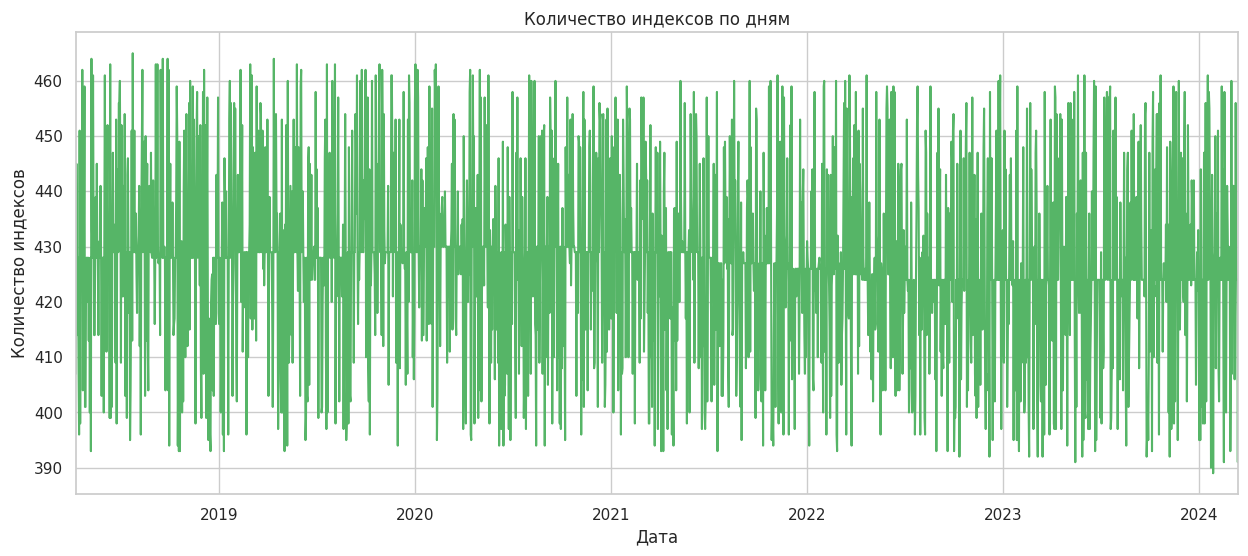

In [25]:
sns.set(style="whitegrid")
plt.figure(figsize = (15, 6))
sns.lineplot(data=data_real_sum_indexes, color = sns.color_palette("Greens")[3])
plt.title('Количество индексов по дням')
plt.xlabel('Дата')
plt.ylabel('Количество индексов')
plt.xlim(data_real_sum_indexes.index[0], data_real_sum_indexes.index[-1])
plt.show()

Найдём такое же распределение по датам, но с учётом дубликатов.

In [26]:
data_real_sum_indexes_dub = data_raw.groupby(["date_of"]).size()

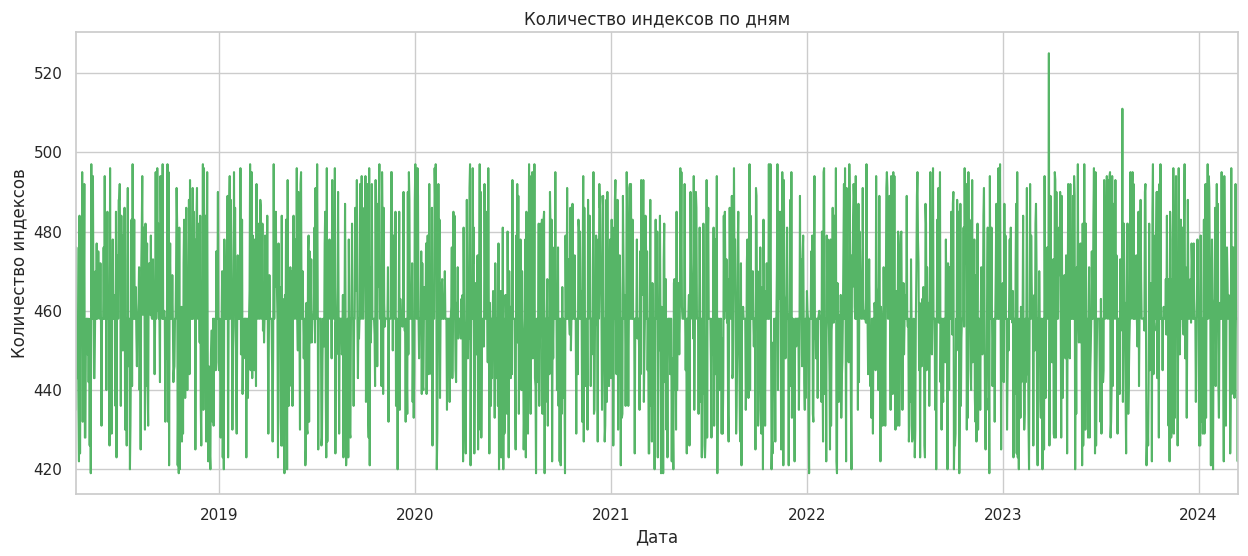

In [27]:
sns.set(style="whitegrid")
plt.figure(figsize = (15, 6))
sns.lineplot(data=data_real_sum_indexes_dub, color = sns.color_palette("Greens")[3])
plt.title('Количество индексов по дням')
plt.xlabel('Дата')
plt.ylabel('Количество индексов')
plt.xlim(data_real_sum_indexes_dub.index[0], data_real_sum_indexes_dub.index[-1])
plt.show()

Наши ряды несильно отличаются, но есть два значения-выброса во втором ряду, изучим их детальнее

In [28]:
data_anomalies = data_raw[data_raw["date_of"].isin(data_real_sum_indexes_dub[data_real_sum_indexes_dub > 500].index)]
data_anomalies

,benchmark_id,benchmark_name,date_of,quote,ctl_loading,ctl_loading_date
831256,5CAD7A39-D0BA-44FD-AAEE-12FA2F99B619,50% RUCBITR + 50% RUCBITRBBB,2023-03-28,46.890133,89749643545,2023-03-29
831257,5DDB5E56-7829-42D8-828A-14CCEBC33465,Исторический ОПИФ Фонд российских акций,2023-03-28,14.694070,89749643545,2023-03-29
831258,5E44786C-EA94-4EE5-8E57-30A9E2EF5905,Ставка-индекс для Денежного рынка (истор.бенч),2023-03-28,1380.033797,89749643545,2023-03-29
831259,605DA33F-80DB-4820-8B53-DEDA333D1E94,SMDYNAMIC,2023-03-28,2.393874,89749643545,2023-03-29
831260,62041476-2758-4034-8290-B7EAEB30949F,"Ставка 7,09%",2023-03-28,65.353027,89749643545,2023-03-29
...,...,...,...,...,...,...
937916,8A1B3F5D-9791-48C5-944F-2F282C42B513,(33%MOEXCN + 33%MOEXFN + 34%MOEXIT),2023-08-12,36.775256,88180054742,2023-11-13
937917,8AF7C8C2-84C0-4E4B-AAC1-8847A3529B27,S&P 500 Utilities Net Total Return Index,2023-08-12,731.568223,88180054742,2023-11-13
937918,8B022FC6-5586-4535-A2AA-5966F2BA2ABC,Агрессивный портфель RUB,2023-08-12,125.626063,88180054742,2023-11-13
937919,8C262C4E-FAA7-4C2B-9700-774A3F3B8F79,IFX-Cbonds,2023-08-12,2.116819,88180054742,2023-11-13


In [29]:
data_anomalies.groupby(["date_of", "ctl_loading_date", "ctl_loading"]).size()

date_of     ctl_loading_date  ctl_loading
2023-03-28  2023-03-29        89749643545    457
            2023-05-24        79237340281     30
            2023-08-06        86939151459     38
2023-08-12  2023-08-12        26928123523    458
            2023-09-16        2665755041      25
            2023-11-13        88180054742     28
dtype: int64

In [30]:
data_real_sum_indexes[data_real_sum_indexes.index.isin(data_anomalies["date_of"].unique())]

date_of
2023-03-28    423
2023-08-12    424
dtype: int64

Судя по всему, в обоих случаях имели место крупные уточнения данных за прошлые периоды, что не считается аномалией. Это наводит на мысль о том, что в данной задаче учёт агрегированного количества бенчмарков в посылках (сумм строк за все предыдущие посылки, относящиеся к данной дате) может приводить к визуальным аномалиям, которые таковыми не являются, поэтому на наш взгляд лучше будет рассматривать количества строк без дубликатов. Это мы и сделаем, и дальше работаем только с рядом без дубликатов.

В данном ряду не наблюдается визуальных выбросов, значения распределены близко к нормальному. Более того, этот ряд является стационарным, что будет важно при обучении регрессионных моделей.

In [31]:
from statsmodels.tsa import stattools

In [32]:
def check_adf_stat(ts):
  df_stat = stattools.adfuller(ts)
  print('The Augmented Dickey-Fuller test statistic %f, \npvalue: %.2f\ncritical values: %s' %
        (df_stat[0], df_stat[1], df_stat[4]))

  if df_stat[0] > df_stat[4]['5%']:
      print('Есть единичные корни - ряд нестационарный')
  else:
      print('Единичных корней нет, ряд стационарен')

check_adf_stat(data_real_sum_indexes)

The Augmented Dickey-Fuller test statistic -46.051222, 
pvalue: 0.00
critical values: {'1%': -3.4333712566259007, '5%': -2.8628746849930136, '10%': -2.567480519733324}
Единичных корней нет, ряд стационарен


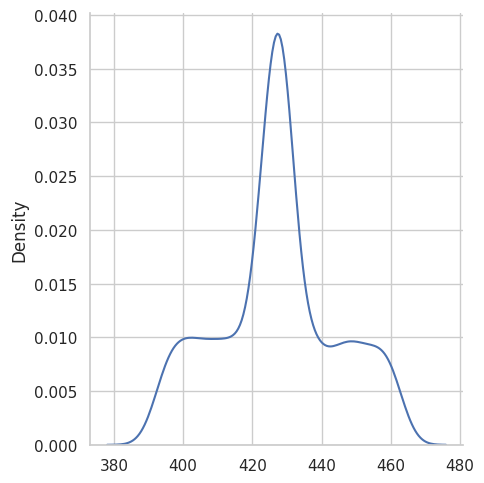

In [33]:
sns.displot(data=data_real_sum_indexes, kind="kde")

А этот ряд - количество бенчмарков в посылке, соответствующий тому или иному дню индексов внутри неё.

В день, когда приходило несколько небольших пакетов с индексами бралось максимальное значение из них - так как это не соответствует стандартной работе системы и скорее всего может рассматриваться как аномалия

<Axes: xlabel='date_of'>

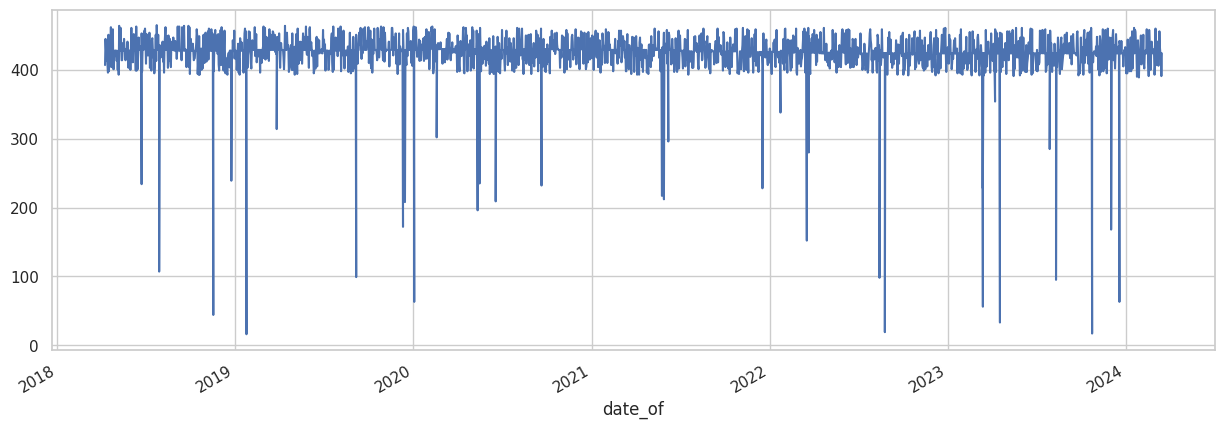

In [34]:
data_as_ts = loadings["agg_quan_no_dub"]
data_as_ts.index = loadings['date_of'].map(pd.Timestamp)
data_as_ts = data_as_ts.sort_index()
data_as_ts.plot(figsize = (15, 5))

Внутри ряда заметны очевидные выбросы. Ещё более они заметны если посмотреть на распределение ряда:

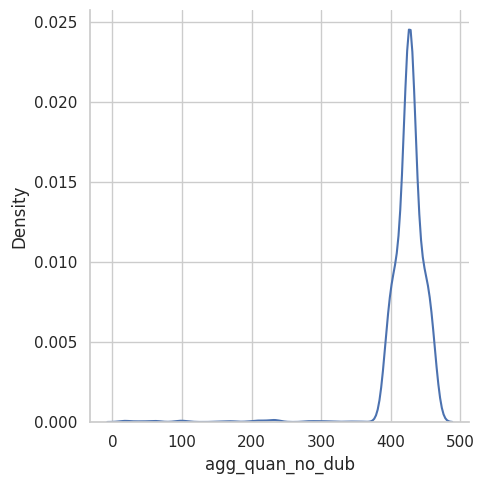

In [35]:
sns.displot(data=data_as_ts, kind="kde")

А если мы вычтем их друг из друга, то аномалии станут максимально заметны как на графике временного ряда, так и на графике распределения:

<Axes: xlabel='date_of'>

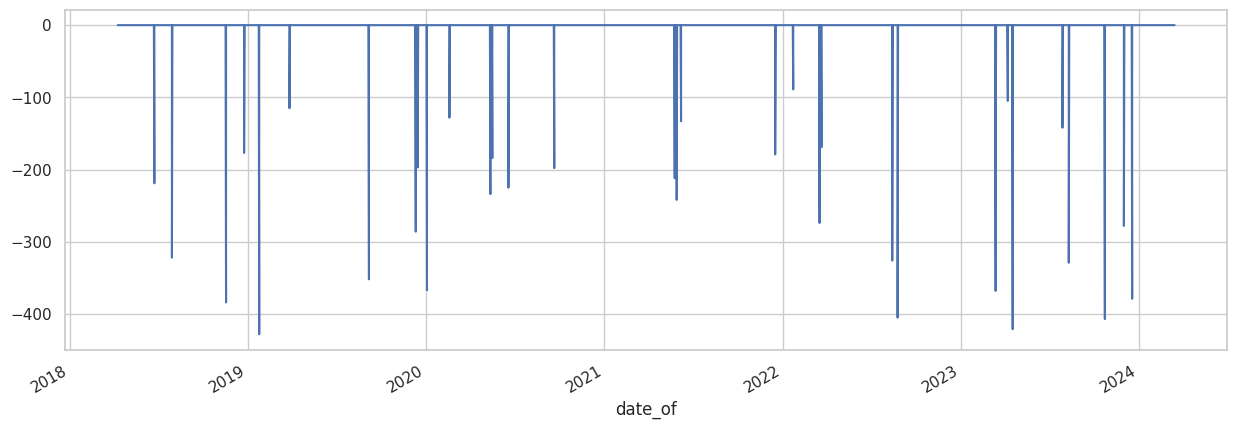

In [36]:
data_anomaly_detection = (data_as_ts - data_real_sum_indexes)
data_anomaly_detection.plot(figsize = (15, 5))

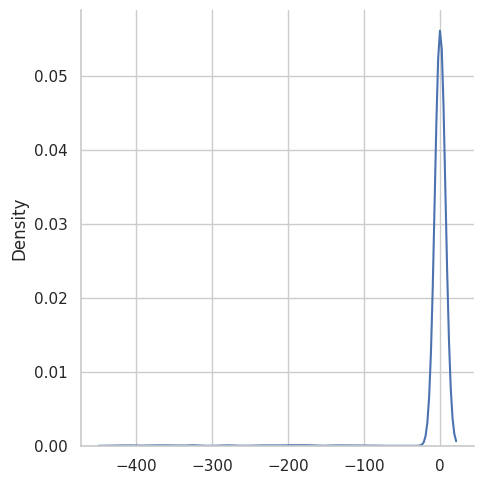

In [37]:
sns.displot(data=data_anomaly_detection, kind="kde")

#### Наша гипотеза заключается в следующем:

1. Данные по количеству бенчмарков на определенный день, которые имеются в данных нашей совокупности временных рядов являются стационарным рядом, который можно легко прогнозировать и на будущие периоды.
2. Разница между значениями ряда бенчмарков на определенный день и количеством бенчмарков в посылке, соответствующей определенному дню, является величиной, которая однозначно позволяет выявить аномалию статистическими методами.

#### Таким образом, наше решение в рамках данной гипотезы будет состоять из следующих элементов:

1. Регрессионная модель для предсказания количества бенчмарков в посылке на определенный день.
2. Модель классификации аномалий, позволяющая оценить "нормальность" посылки по отклонению количества бенчмарков внутри неё от прогноза регрессионной модели.

## Регрессионная модель

### Train test split

Разобьем данные на тренировочные, тестовые и финальный прогноз на 15 число.

In [38]:
data_train = data_real_sum_indexes[:-31]
data_test = data_real_sum_indexes[len(data_train):-1]
data_final = data_real_sum_indexes[-1]

/tmp/ipykernel_14736/2732080528.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  data_final = data_real_sum_indexes[-1]


### Обучение модели

В качестве архитектуры будем использовать авторегрессионную модель с константным трендом, так как ряд является стационарным.

In [39]:
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

In [40]:
model = AutoReg(data_train, lags = [1, 2, 3, 4, 5, 6, 7, 10, 20, 30, 100, 200, 365], trend='c').fit()
print(model.summary())

/home/guettoman/Desktop/cup_it_24/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                             AutoReg Model Results                             
Dep. Variable:                       y   No. Observations:                 2137
Model:             Restr. AutoReg(365)   Log Likelihood               -7510.156
Method:                Conditional MLE   S.D. of innovations             16.765
Date:                 Mon, 01 Apr 2024   AIC                          15050.313
Time:                         02:18:58   BIC                          15132.511
Sample:                     04-09-2019   HQIC                         15080.679
                          - 02-13-2024                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        370.2152     34.331     10.784      0.000     302.928     437.502
y.L1           0.0201      0.024      0.847      0.397      -0.026       0.067
y.L2          -0.0100      0.024     -0.421 

Параметры модели

In [41]:
model.params

const     370.215175
y.L1        0.020135
y.L2       -0.009978
y.L3        0.009699
y.L4       -0.024682
y.L5        0.007530
y.L6        0.062681
y.L7        0.033594
y.L10       0.027661
y.L20      -0.039848
y.L30       0.007455
y.L100      0.054878
y.L200     -0.005080
y.L365     -0.011495
dtype: float64

### Прогнозы модели

/home/guettoman/Desktop/cup_it_24/.venv/lib/python3.10/site-packages/statsmodels/tsa/deterministic.py:307: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


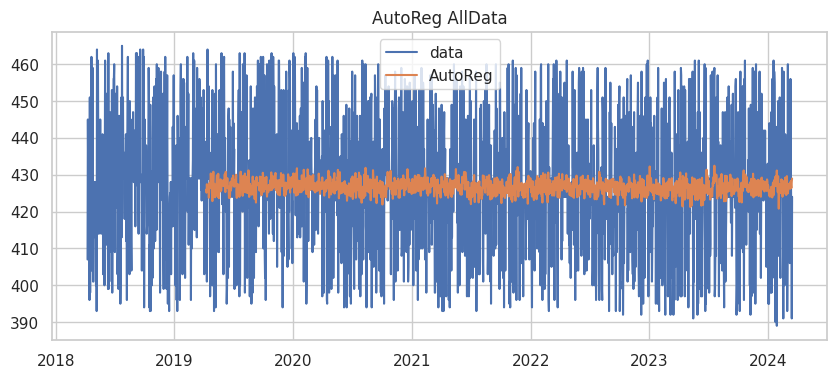

МЕТРИКИ:
RMSE = 16.795
MAPE = 0.173


In [42]:
y_hat = model.predict(start=0, end=len(data_real_sum_indexes)-1)
plt.figure(figsize=(10,4))
plt.plot(data_real_sum_indexes.index, data_real_sum_indexes.values, label='data')
plt.plot(data_real_sum_indexes.index, y_hat, label='AutoReg')
plt.legend(loc='best')
plt.title('AutoReg AllData')
plt.show()
print('МЕТРИКИ:')
print('RMSE = %.3f' % mean_squared_error(data_real_sum_indexes.values[365:], y_hat[365:]) ** 0.5)
print('MAPE = %.3f' % mean_absolute_percentage_error(data_real_sum_indexes.values[365:], y_hat[365:]) ** 0.5)

/home/guettoman/Desktop/cup_it_24/.venv/lib/python3.10/site-packages/statsmodels/tsa/deterministic.py:307: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


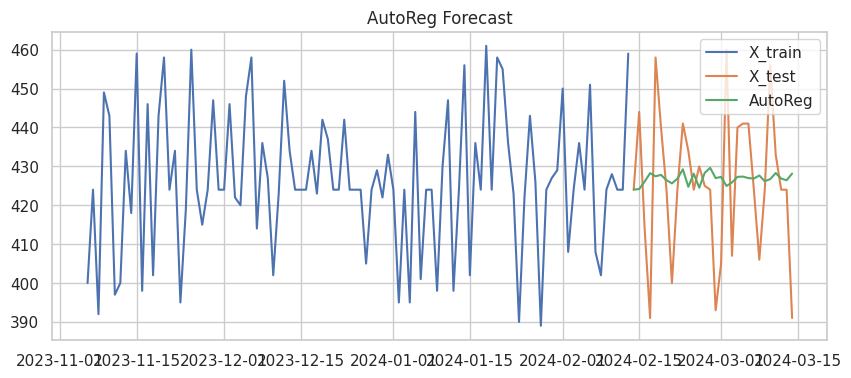

RMSE = 18.733
MAPE = 0.186


In [43]:
y_hat = model.predict(start=len(data_train), end=(len(data_train)+len(data_test)-1))
plt.figure(figsize=(10,4))
plt.plot(data_train.index[-100:], data_train.values[-100:], label='X_train')
plt.plot(data_test.index, data_test.values, label='X_test')
plt.plot(data_test.index, y_hat, label='AutoReg')
plt.legend(loc='best')
plt.title('AutoReg Forecast')
plt.show()
print('RMSE = %.3f' % mean_squared_error(data_test.values, y_hat) ** 0.5)
print('MAPE = %.3f' % mean_absolute_percentage_error(data_test.values, y_hat) ** 0.5) 

## Детекция аномалий

### На всем временном ряду:

/home/guettoman/Desktop/cup_it_24/.venv/lib/python3.10/site-packages/statsmodels/tsa/deterministic.py:307: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


<Axes: >

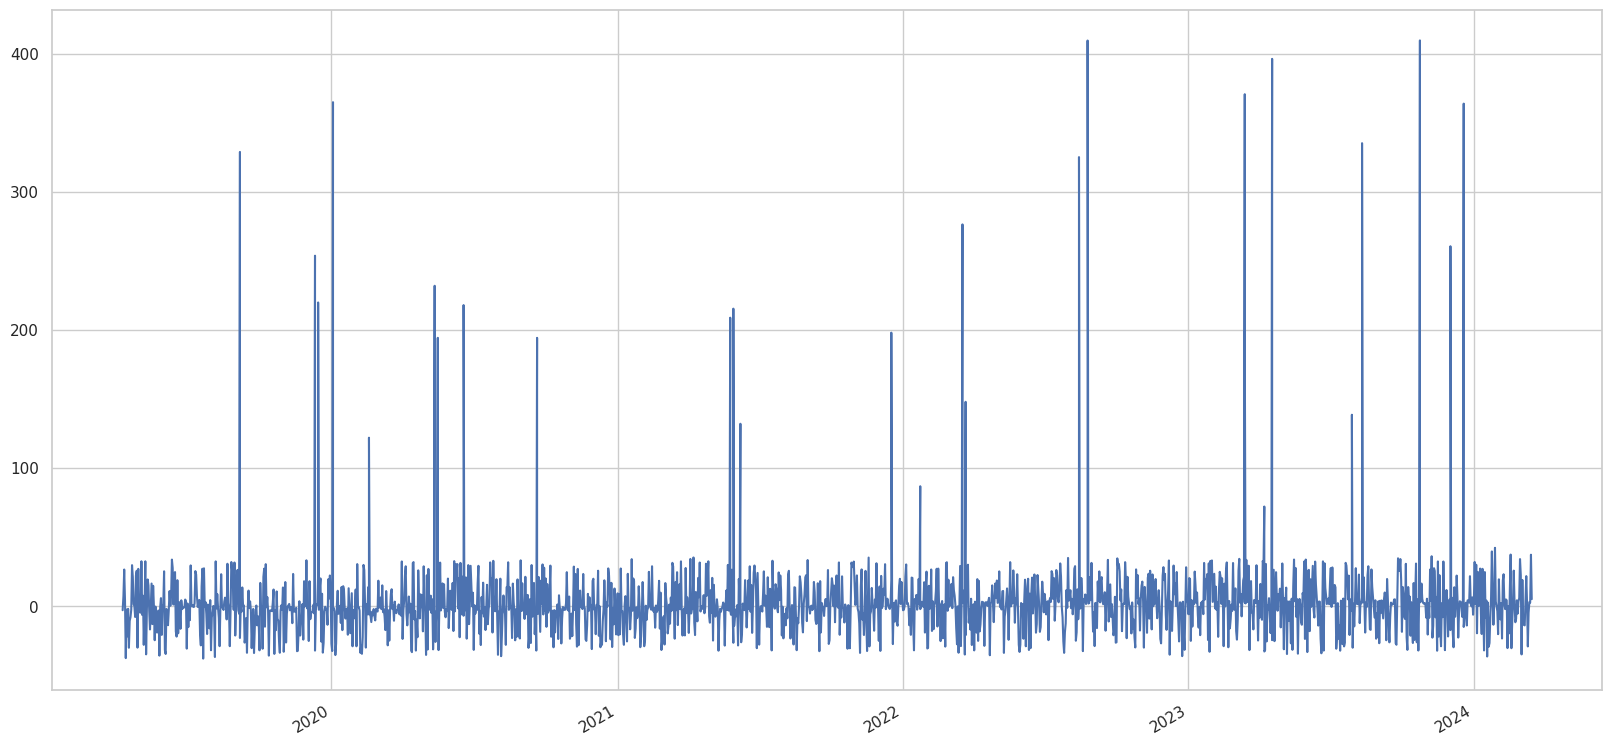

In [44]:
y_hat_all_TS = model.predict(start=0, end=len(data_real_sum_indexes)-1)
data_anomaly_autoregression = (y_hat_all_TS[365:]-data_as_ts[365:])
data_anomaly_autoregression.plot(figsize = (20,10))

#### Z-score

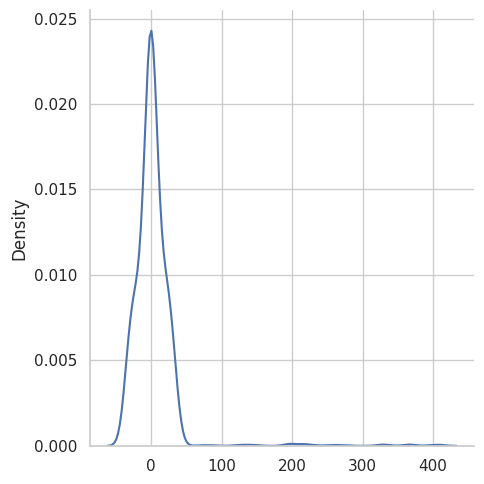

In [45]:
sns.displot(data=data_anomaly_autoregression, kind="kde")

Как мы видим - распределение близко к нормальному. А значит в качестве метрики для "отсечения" аномальных точек" в генеральной совокупности мы можем использовать Z-score точек.

In [46]:
df_num = pd.DataFrame(data_anomaly_autoregression[22:], columns = ['quotes_number'])
df_num ['date_of'] = df_num.index

<Axes: xlabel='date_of', ylabel='quotes_number'>

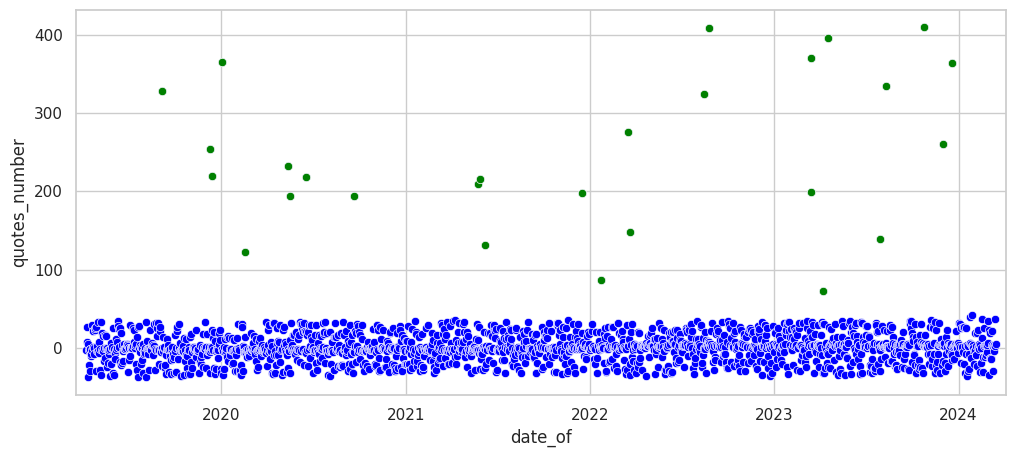

In [68]:
from scipy import stats

plt.figure(figsize=(12, 5))
sns.scatterplot(x='date_of', y='quotes_number', data=df_num, color='blue')
plt.title('')
plt.xlabel('')
plt.ylabel('')
plt.xlim(df_num["date_of"].min() - pd.DateOffset(days=20), df_num["date_of"].max() + pd.DateOffset(days=20))

z_scores = stats.zscore(df_num['quotes_number'])
mu = df_num["quotes_number"].mean()
sigma = df_num["quotes_number"].std()
pd.DataFrame({"mu": [mu], "sigma": [sigma]}).to_csv("musigma.csv", index=False)
threshold = 1.6
outliers = df_num[(z_scores > threshold) | (z_scores < -threshold)]

# Отмечаем выбросы на графике
sns.scatterplot(x='date_of', y='quotes_number', data=outliers, color='green')

#### DBSCAN

In [48]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [49]:
dataset = df_num["quotes_number"].reset_index()
dataset.rename(columns={"index": "date_of"}, inplace=True)
dataset["date_of_numeric"] = dataset["date_of"].astype(np.int64)

In [50]:
ctl_of_dates = pd.DataFrame(data_raw.groupby(["ctl_loading"])["date_of"].unique().str[0].astype("datetime64[ns]")).reset_index()
ctl_dataset = pd.merge(ctl_of_dates, dataset, on="date_of")

In [52]:
clusterizator = DBSCAN(min_samples=10).fit(StandardScaler().fit_transform(X=ctl_dataset[["date_of_numeric", "quotes_number"]],y=None))

In [53]:
label_copy = clusterizator.labels_[:]
label_copy[label_copy == 0] = 1

(17975.0, 19817.0)

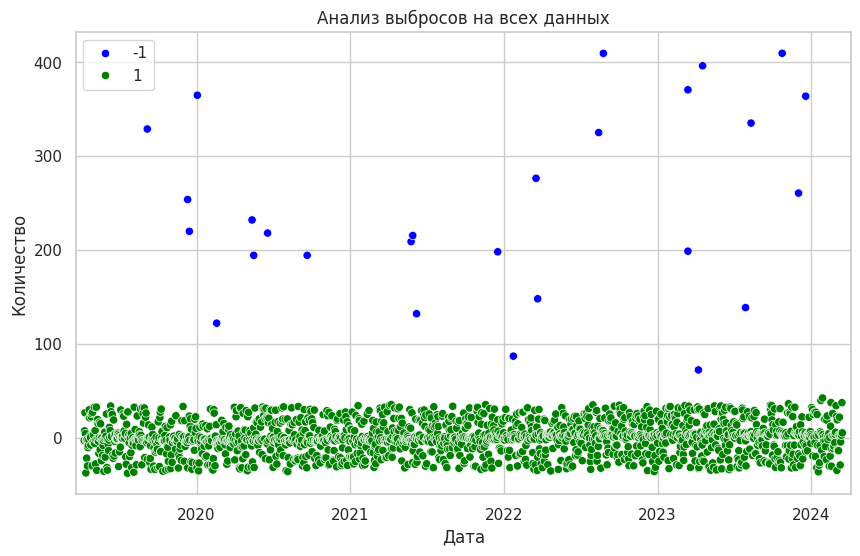

In [54]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=dataset, x="date_of", y="quotes_number", hue = clusterizator.labels_, palette = ["blue", "green"])
plt.title('Анализ выбросов на всех данных')
plt.xlabel('Дата')
plt.ylabel('Количество')

plt.xlim(dataset["date_of"].min() - pd.DateOffset(days=20), dataset["date_of"].max() + pd.DateOffset(days=20))

### На новых данных

Таким образом, для новых данных алгоритм будет работать следующим образом:

1. Принимает на вход информацию о посылках в том же виде, что и в исходном датасете;
2. По дате посылки оценивает ожидаемый объем посылки через авторегрессионную модель;
3. Сравнивает разницу между фактическим объемом данных за день, к котрому относится посылка, и ожидаемым объемом данных за день, к которому относится посылка, отсекает данные с помощью z-score. z-score из всех моделей выбран из-за своей понятной математической интерпретации. Мы вынуждены устанавливать значение z-score ниже 3 из-за наличия шума в данных: из-за него многие точки в распределении отклоняются от своего положения без шума, из-за чего увеличивается дисперсия распределения, и выбросы начинают достаточно часто попадать в границу 3 сигм. Значение 1.6 подобрано эмпирическим путём.

In [81]:
def predict_labels_z_score(data: pd.DataFrame, threshold=1.6) -> np.ndarray:
    global model, clusterizator
    
    #Получаем историю поставок, чтобы посчитать агрегированное количество бенчмарков
    historic_data: pd.DataFrame = pd.read_csv("data.csv", parse_dates=["date_of", "ctl_loading_date"])
    historic_data = historic_data[historic_data["date_of"].isin(data["date_of"].unique())]
    
    #Складываем входные данные и данные из прошлого
    all_data: pd.DataFrame = pd.concat([historic_data, data]).drop_duplicates()
    values: np.ndarray = pd.DataFrame([0] * len(data["ctl_loading"].unique()), columns=["val"])
    values.index = data["ctl_loading"].unique()
    for loading in data["ctl_loading"].unique():
        loading_data = data[data["ctl_loading"] == loading]
        date_of = loading_data["date_of"].unique()[0]
        ctl_date = loading_data["ctl_loading_date"].unique()[0]
        values.loc[loading, "val"] = len(all_data[(all_data["date_of"] == date_of) & (all_data["ctl_loading_date"] <= ctl_date)].drop_duplicates(subset=["benchmark_id"]))
        
    #Для каждой поставки предсказываем её значение поставок в date_of 
    ctl_dates: np.ndarray = pd.DataFrame(data.groupby(["ctl_loading"])["date_of"].unique().str[0].astype("datetime64[ns]")).reset_index()
    
    preds: pd.DataFrame = pd.DataFrame(model.predict(ctl_dates["date_of"].min(), ctl_dates["date_of"].max()))
    preds.reset_index(inplace=True)
    preds.rename(columns={0: "quotes_number", "index": "date_of"}, inplace=True)
    
    ctl_dates.rename(columns={0: "date_of"}, inplace=True)
    ctl_dates = pd.merge(ctl_dates, preds, on=["date_of"])
    ctl_dates.set_index("ctl_loading", inplace=True)
    ctl_dates["quotes_number"] -= values["val"]
    
    musigma: pd.DataFrame = pd.read_csv("musigma.csv")
    mu = musigma.loc[0, "mu"]
    sigma = musigma.loc[0, "sigma"]
    
    ctl_dates["quotes_number"] -= mu
    ctl_dates["quotes_number"] /= sigma
    ctl_dates["quotes_number"] = ctl_dates["quotes_number"].apply(abs)
    pred = (ctl_dates["quotes_number"] < threshold).replace({False: "Anomaly", True: "Normal"})
    return pred
    
    
    

In [84]:
print(predict_labels_z_score(data_raw[data_raw["date_of"] == pd.to_datetime("2024-03-15")]))

ctl_loading
83427809714    Normal
Name: quotes_number, dtype: object


/home/guettoman/Desktop/cup_it_24/.venv/lib/python3.10/site-packages/statsmodels/tsa/deterministic.py:307: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


Ответ на ключевой вопрос: поставка от 15 марта не является аномальной.